## CMPINF 2100 Week 13
### Fitting and assessing the performance of multiple CLASSIFICATION models
This notebook brings together EVERYTHING from Week 12 and Week 13!!!

We need programming skills covered since the BEGINNING of the semester!!!
## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
import statsmodels.formula.api as smf

We need 3 functions from SKLEARN to streamline calculating the classification performance.

In [3]:
from sklearn.metrics import confusion_matrix

In [4]:
from sklearn.metrics import roc_curve

In [5]:
from sklearn.metrics import roc_auc_score

## Read data
Use new data NOT from previous week!

In [6]:
df = pd.read_csv("week_12_binary_classification.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      300 non-null    float64
 1   x2      300 non-null    float64
 2   x3      300 non-null    float64
 3   x4      300 non-null    float64
 4   x5      300 non-null    object 
 5   y       300 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 14.2+ KB


In [8]:
df

,x1,x2,x3,x4,x5,y
0,1.077412,-0.991094,0.208610,-1.019744,c,1
1,-0.637747,-0.307506,-1.794250,1.189993,b,0
2,1.345143,-1.075281,1.685044,0.167879,b,0
3,1.659924,0.735156,-0.210541,-2.534105,b,1
4,1.182378,1.599140,-0.301995,1.206648,b,0
...,...,...,...,...,...,...
295,1.239739,1.572756,0.610548,1.402896,c,0
296,-0.528292,3.120873,0.357688,-0.599724,c,0
297,0.256334,1.293508,0.023925,-0.996928,b,0
298,-0.628451,0.373513,0.038140,2.197234,b,1


In [9]:
df.nunique()

x1    300
x2    300
x3    300
x4    300
x5      3
y       2
dtype: int64

In [12]:
df.y.value_counts()

y
0    198
1    102
Name: count, dtype: int64

In [13]:
df.y.value_counts(normalize=True)

y
0    0.66
1    0.34
Name: proportion, dtype: float64

In [11]:
df.x5.value_counts()

x5
b    150
c     75
a     75
Name: count, dtype: int64

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


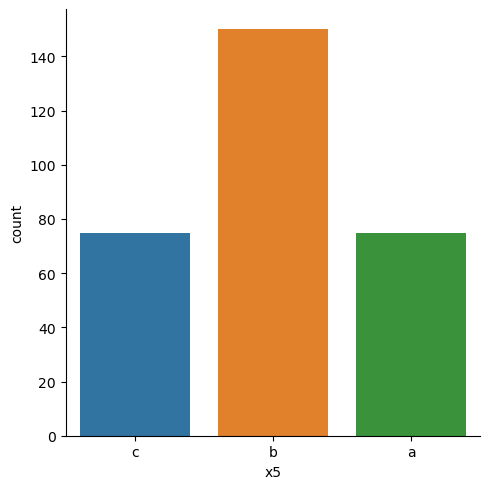

In [14]:
sns.catplot(data=df, kind="count", x="x5", hue="x5")

plt.show()

In [15]:
df.describe()

,x1,x2,x3,x4,y
count,300.000000,300.000000,300.000000,300.000000,300.0000
mean,-0.000849,0.000261,0.002302,0.001372,0.3400
std,0.998805,1.000864,1.004086,1.001563,0.4745
min,-2.913116,-3.008946,-2.783621,-2.864881,0.0000
25%,-0.673919,-0.671703,-0.673862,-0.673474,0.0000
50%,0.000468,-0.001799,0.001278,0.002178,0.0000
75%,0.673103,0.671835,0.674558,0.670999,1.0000
max,2.783826,3.120873,3.497789,3.128220,1.0000


## Fitting logistic regression models
Lets start with the SIMPLEST possible logistic regression model!

The event probability is a constant and DOES NOT depend on any inputs!!

In [16]:
mod_aa = smf.logit(formula="y ~ 1", data=df).fit()

Optimization terminated successfully.
         Current function value: 0.641035
         Iterations 4


In [17]:
mod_aa.params

Intercept   -0.663294
dtype: float64

Fit a model with LINEAR ADDITIVE FEATURES which includes continuous and categorical inputs!

In [19]:
mod_bb = smf.logit(formula="y ~ x1 + x2 + x3 + x4 + x5", data=df).fit()

Optimization terminated successfully.
         Current function value: 0.588229
         Iterations 5


In [20]:
mod_bb.params

Intercept   -0.674470
x5[T.b]     -0.289844
x5[T.c]      0.310042
x1           0.310394
x2          -0.579591
x3           0.113856
x4          -0.048754
dtype: float64

In [21]:
mod_bb.pvalues

Intercept    0.007968
x5[T.b]      0.356504
x5[T.c]      0.380769
x1           0.017173
x2           0.000024
x3           0.380242
x4           0.708586
dtype: float64

But, logistic regression models can also use NON-LINEAR FEATURES derived from the inputs AND INTERACTIONS between inputs!

In [22]:
mod_cc = smf.logit(formula="y ~ x5 * (x1 + x2 + x3 + x4) + np.power(x1, 2) + np.power(x2 ,2) + np.power(x3 ,2) + np.power(x4 ,2)", 
                   data=df).fit()

Optimization terminated successfully.
         Current function value: 0.489643
         Iterations 7


In [23]:
mod_cc.params

Intercept          0.476079
x5[T.b]           -0.503065
x5[T.c]            0.166176
x1                 0.462254
x5[T.b]:x1        -0.080122
x5[T.c]:x1         0.423130
x2                -1.326700
x5[T.b]:x2         0.505468
x5[T.c]:x2         0.192249
x3                -0.087513
x5[T.b]:x3         0.651306
x5[T.c]:x3        -0.066232
x4                -0.156396
x5[T.b]:x4         0.075847
x5[T.c]:x4         0.283769
np.power(x1, 2)   -0.746746
np.power(x2, 2)   -0.635702
np.power(x3, 2)   -0.180378
np.power(x4, 2)    0.155571
dtype: float64

In [24]:
mod_cc.pvalues

Intercept          0.208022
x5[T.b]            0.177458
x5[T.c]            0.702337
x1                 0.152102
x5[T.b]:x1         0.845645
x5[T.c]:x1         0.368581
x2                 0.001857
x5[T.b]:x2         0.278840
x5[T.c]:x2         0.714286
x3                 0.746536
x5[T.b]:x3         0.067429
x5[T.c]:x3         0.869978
x4                 0.587215
x5[T.b]:x4         0.830757
x5[T.c]:x4         0.525848
np.power(x1, 2)    0.000025
np.power(x2, 2)    0.000126
np.power(x3, 2)    0.108774
np.power(x4, 2)    0.148404
dtype: float64

Lets now define a function that allows us to FIT and CALCULATE the training set performance for ANY FORMULA!!

In [79]:
def fit_and_assess_logistic(mod_name, a_formula, train_data, threshold):
    a_mod = smf.logit(formula=a_formula, 
                      data=train_data).fit()
    train_copy = train_data.copy()
    
    train_copy["pred_probability"] = a_mod.predict(train_data)
    
    train_copy["pred_class"] = np.where(train_copy["pred_probability"] > threshold, 1, 0)

    TN, FP, FN, TP = confusion_matrix(train_copy.y.to_numpy(), train_copy.pred_class.to_numpy()).ravel()

    Accuracy = (TN + TP)/(TN + TP + FN + FP)

    Sensitivity = TP/(TP + FN)

    Specificity = TN/(TN + FP)

    FPR = 1 - Specificity

    ROC_AUC = roc_auc_score(train_copy.y.to_numpy(), train_copy.pred_probability.to_numpy())

    res_dict = {"model_name": mod_name,
               "model_formula": a_formula,
               "num_coefs": len(a_mod.params),
               "threshold": threshold,
               "Accuracy": Accuracy,
               "Sensitivity": Sensitivity,
               "Specificity": Specificity,
               "FPR": FPR,
               "ROC_AUC": ROC_AUC}

    return pd.DataFrame(res_dict, index=[0])

In [26]:
fit_and_assess_logistic(0, "y ~ 1", train_data=df, threshold=0.5)

Optimization terminated successfully.
         Current function value: 0.641035
         Iterations 4


,model_name,model_formula,num_coefs,threshold,Accuracy,Sensitivity,Specificity,FPR,ROC_AUC
0,0,y ~ 1,1,0.5,0.66,0.0,1.0,0.0,0.5


Lets define a VERY BIG list of DIFFERENT formulas!!!

In [33]:
# He recommends starting with the constant model, 
# Followed by a model with just the categorical variables, 
# Followed by an additive model with just the continuous variables
# Followed by adding both the continuous and categorical variables as an additive model
# Followed by taking the categorical variable(s) interacting with each continuous variable
# Followed by pairwise relationships between continuous variables
# Followed by a model that adds all the continuous variables with their squared counterparts
# Followed by the previous model WITH the categorical variables added
# Followed by a model takes the previous previous model with the interaction of the categorical variable 
# Followed by a model looks at the additive relationship between the categorical variable, the pairwise relationship of the continuous vars,
# and the squared counterparts
# The same model as before, except we are looking at the interaction of the categorical variable with the pairwise relationships and squared counterparts
# Followed by the additive relationship between the categorical variable and the triple-wise relationship between continuous variables
# Followed by the additive relationship between the categorical variable and the four-wise relationship between continuous variables
# Followed by a model that looks at the triple-wise relationship between the continuous and categorical variables
# Followed by a model that looks at the four-wise relationship between the continuous and categorical variables
# Followed by the categorical interacting with (the triple-wise relationship between the continuous variables + the squared and cubic continous counterparts)
# Followed by the categorical interacting with (the triple-wise relationship between the continuous variables + the squared, cubic, fourth power continous counterparts)



formula_list = ["y ~ 1",
               "y ~ x5",
               "y ~ x1 + x2 + x3 + x4",
               "y ~ x1 + x2 + x3 + x4 + x5",
               "y ~ x5 * (x1 + x2 + x3 + x4)",
               "y ~ (x1 + x2 + x3 + x4) ** 2",
               "y ~ x1 + x2 + x3 + x4 + np.power(x1, 2) + np.power(x2 ,2) + np.power(x3 ,2) + np.power(x4 ,2)",
               "y ~ x5 + x1 + x2 + x3 + x4 + np.power(x1, 2) + np.power(x2 ,2) + np.power(x3 ,2) + np.power(x4 ,2)",
               "y ~ x5 * (x1 + x2 + x3 + x4 + np.power(x1, 2) + np.power(x2 ,2) + np.power(x3 ,2) + np.power(x4 ,2))",
               "y ~ x5 + ((x1 + x2 + x3 + x4) ** 2 + np.power(x1, 2) + np.power(x2 ,2) + np.power(x3 ,2) + np.power(x4 ,2))",
               "y ~ x5 * ((x1 + x2 + x3 + x4) ** 2 + np.power(x1, 2) + np.power(x2 ,2) + np.power(x3 ,2) + np.power(x4 ,2))",
               "y ~ x5 + (x1 + x2 + x3 + x4) ** 3",
               "y ~ x5 + (x1 + x2 + x3 + x4) ** 4",
               "y ~ (x1 + x2 + x3 + x4 + x5) ** 3",
               "y ~ (x1 + x2 + x3 + x4 + x5) ** 4",
               "y ~ x5 * ( (x1 + x2 + x3 + x4) ** 3 + np.power(x1, 2) + np.power(x2 ,2) + np.power(x3 ,2) + np.power(x4 ,2) + np.power(x1, 3) + np.power(x2 ,3) + np.power(x3 ,3) + np.power(x4 ,3))",
               "y ~ x5 * ( (x1 + x2 + x3 + x4) ** 3 + np.power(x1, 2) + np.power(x2 ,2) + np.power(x3 ,2) + np.power(x4 ,2) + np.power(x1, 3) + np.power(x2 ,3) + np.power(x3 ,3) + np.power(x4 ,3) + np.power(x1, 4) + np.power(x2 ,4) + np.power(x3 ,4) + np.power(x4 ,4))"]

In [34]:
formula_list[0]

'y ~ 1'

In [35]:
formula_list[3]

'y ~ x1 + x2 + x3 + x4 + x5'

Use a for-loop to ITERATE over all formulas!!!

In [37]:
results_list = []

for m in range(len(formula_list)):
    results_list.append(fit_and_assess_logistic(m, formula_list[m], train_data=df, threshold=0.5))

Optimization terminated successfully.
         Current function value: 0.641035
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.634259
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594506
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588229
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569593
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.587858
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.513238
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.503664
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.481047
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.499744
  

In [38]:
results_list

[   model_name model_formula  num_coefs  threshold  Accuracy  Sensitivity  \
 0           0         y ~ 1          1        0.5      0.66          0.0   
 
    Specificity  FPR  ROC_AUC  
 0          1.0  0.0      0.5  ,
    model_name model_formula  num_coefs  threshold  Accuracy  Sensitivity  \
 0           1        y ~ x5          3        0.5      0.66          0.0   
 
    Specificity  FPR   ROC_AUC  
 0          1.0  0.0  0.564988  ,
    model_name          model_formula  num_coefs  threshold  Accuracy  \
 0           2  y ~ x1 + x2 + x3 + x4          5        0.5  0.626667   
 
    Sensitivity  Specificity       FPR   ROC_AUC  
 0     0.205882     0.843434  0.156566  0.693207  ,
    model_name               model_formula  num_coefs  threshold  Accuracy  \
 0           3  y ~ x1 + x2 + x3 + x4 + x5          7        0.5      0.66   
 
    Sensitivity  Specificity       FPR  ROC_AUC  
 0     0.264706     0.863636  0.136364  0.70098  ,
    model_name                 model_formula  

In [40]:
len(results_list)

17

In [41]:
results_list[0]

,model_name,model_formula,num_coefs,threshold,Accuracy,Sensitivity,Specificity,FPR,ROC_AUC
0,0,y ~ 1,1,0.5,0.66,0.0,1.0,0.0,0.5


In [42]:
results_list[1]

,model_name,model_formula,num_coefs,threshold,Accuracy,Sensitivity,Specificity,FPR,ROC_AUC
0,1,y ~ x5,3,0.5,0.66,0.0,1.0,0.0,0.564988


Combine all results into a single DataFrame!!

In [43]:
results_df = pd.concat(results_list, ignore_index=True)

In [44]:
results_df

,model_name,model_formula,num_coefs,threshold,Accuracy,Sensitivity,Specificity,FPR,ROC_AUC
0,0,y ~ 1,1,0.5,0.660000,0.000000,1.000000,0.000000,0.500000
1,1,y ~ x5,3,0.5,0.660000,0.000000,1.000000,0.000000,0.564988
2,2,y ~ x1 + x2 + x3 + x4,5,0.5,0.626667,0.205882,0.843434,0.156566,0.693207
3,3,y ~ x1 + x2 + x3 + x4 + x5,7,0.5,0.660000,0.264706,0.863636,0.136364,0.700980
4,4,y ~ x5 * (x1 + x2 + x3 + x4),15,0.5,0.693333,0.274510,0.909091,0.090909,0.731779
5,5,y ~ (x1 + x2 + x3 + x4) ** 2,11,0.5,0.653333,0.245098,0.863636,0.136364,0.700634
6,6,"y ~ x1 + x2 + x3 + x4 + np.power(x1, 2) + np.p...",9,0.5,0.740000,0.588235,0.818182,0.181818,0.788622
7,7,"y ~ x5 + x1 + x2 + x3 + x4 + np.power(x1, 2) +...",11,0.5,0.723333,0.500000,0.838384,0.161616,0.800158
8,8,"y ~ x5 * (x1 + x2 + x3 + x4 + np.power(x1, 2) ...",27,0.5,0.766667,0.558824,0.873737,0.126263,0.822787
9,9,y ~ x5 + ((x1 + x2 + x3 + x4) ** 2 + np.power(...,17,0.5,0.733333,0.519608,0.843434,0.156566,0.801347


Which model is the BEST according to the TRAINING DATA???

In [45]:
results_df.sort_values(by=["Accuracy"], ascending=False)

,model_name,model_formula,num_coefs,threshold,Accuracy,Sensitivity,Specificity,FPR,ROC_AUC
16,16,y ~ x5 * ( (x1 + x2 + x3 + x4) ** 3 + np.power...,81,0.5,0.813333,0.715686,0.863636,0.136364,0.916815
15,15,y ~ x5 * ( (x1 + x2 + x3 + x4) ** 3 + np.power...,69,0.5,0.806667,0.686275,0.868687,0.131313,0.888146
8,8,"y ~ x5 * (x1 + x2 + x3 + x4 + np.power(x1, 2) ...",27,0.5,0.766667,0.558824,0.873737,0.126263,0.822787
10,10,y ~ x5 * ((x1 + x2 + x3 + x4) ** 2 + np.power(...,45,0.5,0.760000,0.588235,0.848485,0.151515,0.851951
6,6,"y ~ x1 + x2 + x3 + x4 + np.power(x1, 2) + np.p...",9,0.5,0.740000,0.588235,0.818182,0.181818,0.788622
14,14,y ~ (x1 + x2 + x3 + x4 + x5) ** 4,46,0.5,0.736667,0.421569,0.898990,0.101010,0.794959
9,9,y ~ x5 + ((x1 + x2 + x3 + x4) ** 2 + np.power(...,17,0.5,0.733333,0.519608,0.843434,0.156566,0.801347
13,13,y ~ (x1 + x2 + x3 + x4 + x5) ** 3,37,0.5,0.726667,0.382353,0.904040,0.095960,0.763171
7,7,"y ~ x5 + x1 + x2 + x3 + x4 + np.power(x1, 2) +...",11,0.5,0.723333,0.500000,0.838384,0.161616,0.800158
12,12,y ~ x5 + (x1 + x2 + x3 + x4) ** 4,18,0.5,0.700000,0.343137,0.883838,0.116162,0.724896


In [46]:
results_df.sort_values(by=["ROC_AUC"], ascending=False)

,model_name,model_formula,num_coefs,threshold,Accuracy,Sensitivity,Specificity,FPR,ROC_AUC
16,16,y ~ x5 * ( (x1 + x2 + x3 + x4) ** 3 + np.power...,81,0.5,0.813333,0.715686,0.863636,0.136364,0.916815
15,15,y ~ x5 * ( (x1 + x2 + x3 + x4) ** 3 + np.power...,69,0.5,0.806667,0.686275,0.868687,0.131313,0.888146
10,10,y ~ x5 * ((x1 + x2 + x3 + x4) ** 2 + np.power(...,45,0.5,0.760000,0.588235,0.848485,0.151515,0.851951
8,8,"y ~ x5 * (x1 + x2 + x3 + x4 + np.power(x1, 2) ...",27,0.5,0.766667,0.558824,0.873737,0.126263,0.822787
9,9,y ~ x5 + ((x1 + x2 + x3 + x4) ** 2 + np.power(...,17,0.5,0.733333,0.519608,0.843434,0.156566,0.801347
7,7,"y ~ x5 + x1 + x2 + x3 + x4 + np.power(x1, 2) +...",11,0.5,0.723333,0.500000,0.838384,0.161616,0.800158
14,14,y ~ (x1 + x2 + x3 + x4 + x5) ** 4,46,0.5,0.736667,0.421569,0.898990,0.101010,0.794959
6,6,"y ~ x1 + x2 + x3 + x4 + np.power(x1, 2) + np.p...",9,0.5,0.740000,0.588235,0.818182,0.181818,0.788622
13,13,y ~ (x1 + x2 + x3 + x4 + x5) ** 3,37,0.5,0.726667,0.382353,0.904040,0.095960,0.763171
4,4,y ~ x5 * (x1 + x2 + x3 + x4),15,0.5,0.693333,0.274510,0.909091,0.090909,0.731779


Is the TRAINING SET performance is getting BETTER as the NUMBER OF COEFFICIENTS INCREASES!!!

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


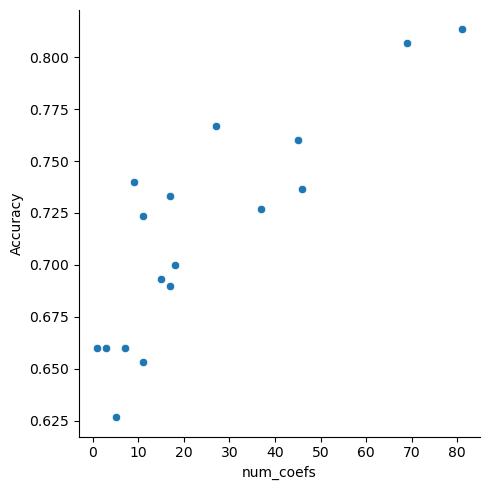

In [47]:
sns.relplot(data=results_df, x="num_coefs", y="Accuracy", kind="scatter")

plt.show()

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


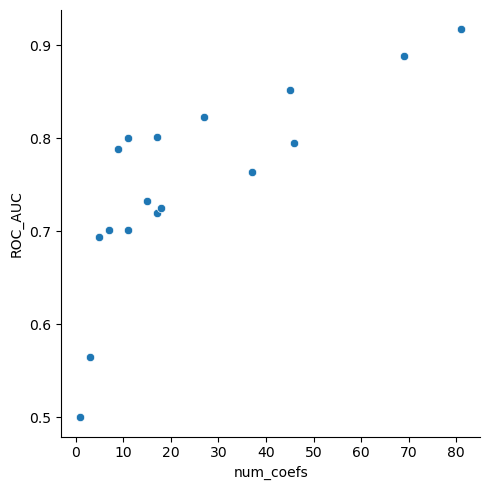

In [48]:
sns.relplot(data=results_df, x="num_coefs", y="ROC_AUC", kind="scatter")

plt.show()

We need to estimate MORE coefficients when we ADD or INCLUDE more FEATURES in the model!!!

Our most COMPLEX model has features coming from POLYNOMIALS **AND** INTERACTIONS!!!

Lets visualize the entire ROC surve for each model. This way we can confirm that ROC AUC metric is ALSO identifying the MOST COMPLEX model as the best.

We need another function that returns the complete ROC Curve for each model.

In [49]:
def fit_logistic_make_roc(mod_name, a_formula, train_data):
    a_mod = smf.logit(formula=a_formula, data=train_data).fit()

    train_copy = train_data.copy()

    train_copy["pred_probability"] = a_mod.predict(train_data)

    fpr, tpr, threshold = roc_curve(train_copy.y.to_numpy(), train_copy.pred_probability.to_numpy())

    res_df = pd.DataFrame({"tpr": tpr,
                          "fpr": fpr,
                          "threshold": threshold})
    res_df["model_name"] = mod_name
    res_df["model_formula"] = a_formula

    return res_df

In [51]:
roc_list = []

for m in range(len(formula_list)):
    roc_list.append(fit_logistic_make_roc(m, formula_list[m], train_data=df))

Optimization terminated successfully.
         Current function value: 0.641035
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.634259
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594506
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588229
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569593
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.587858
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.513238
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.503664
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.481047
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.499744
  

In [52]:
roc_df = pd.concat(roc_list, ignore_index=True)

In [53]:
roc_df

,tpr,fpr,threshold,model_name,model_formula
0,0.000000,0.000000,inf,0,y ~ 1
1,1.000000,1.000000,3.400000e-01,0,y ~ 1
2,0.000000,0.000000,inf,1,y ~ x5
3,0.303922,0.222222,4.133333e-01,1,y ~ x5
4,0.578431,0.459596,3.733333e-01,1,y ~ x5
...,...,...,...,...,...
1589,0.980392,0.313131,1.788519e-01,16,y ~ x5 * ( (x1 + x2 + x3 + x4) ** 3 + np.power...
1590,0.990196,0.313131,1.656527e-01,16,y ~ x5 * ( (x1 + x2 + x3 + x4) ** 3 + np.power...
1591,0.990196,0.363636,1.365934e-01,16,y ~ x5 * ( (x1 + x2 + x3 + x4) ** 3 + np.power...
1592,1.000000,0.363636,1.285808e-01,16,y ~ x5 * ( (x1 + x2 + x3 + x4) ** 3 + np.power...


Lets visualize the ROC curve for each model as a LINE CHART in Seaborn.

In [54]:
roc_df["model_name"] = roc_df.model_name.astype("category")

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


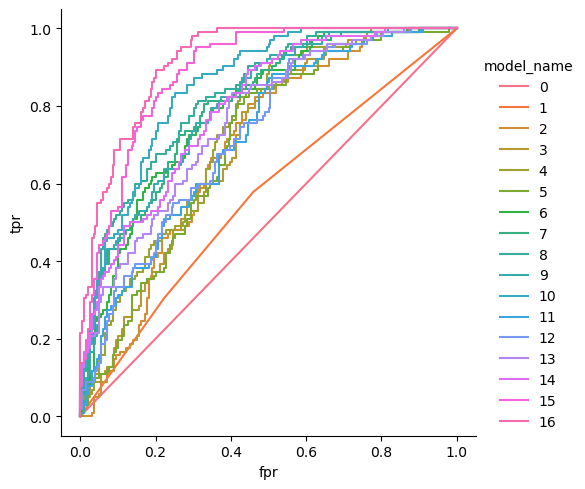

In [55]:
sns.relplot(data=roc_df, x="fpr", y="tpr", hue="model_name",
            kind="line", estimator=None, units="model_name")

plt.show()

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


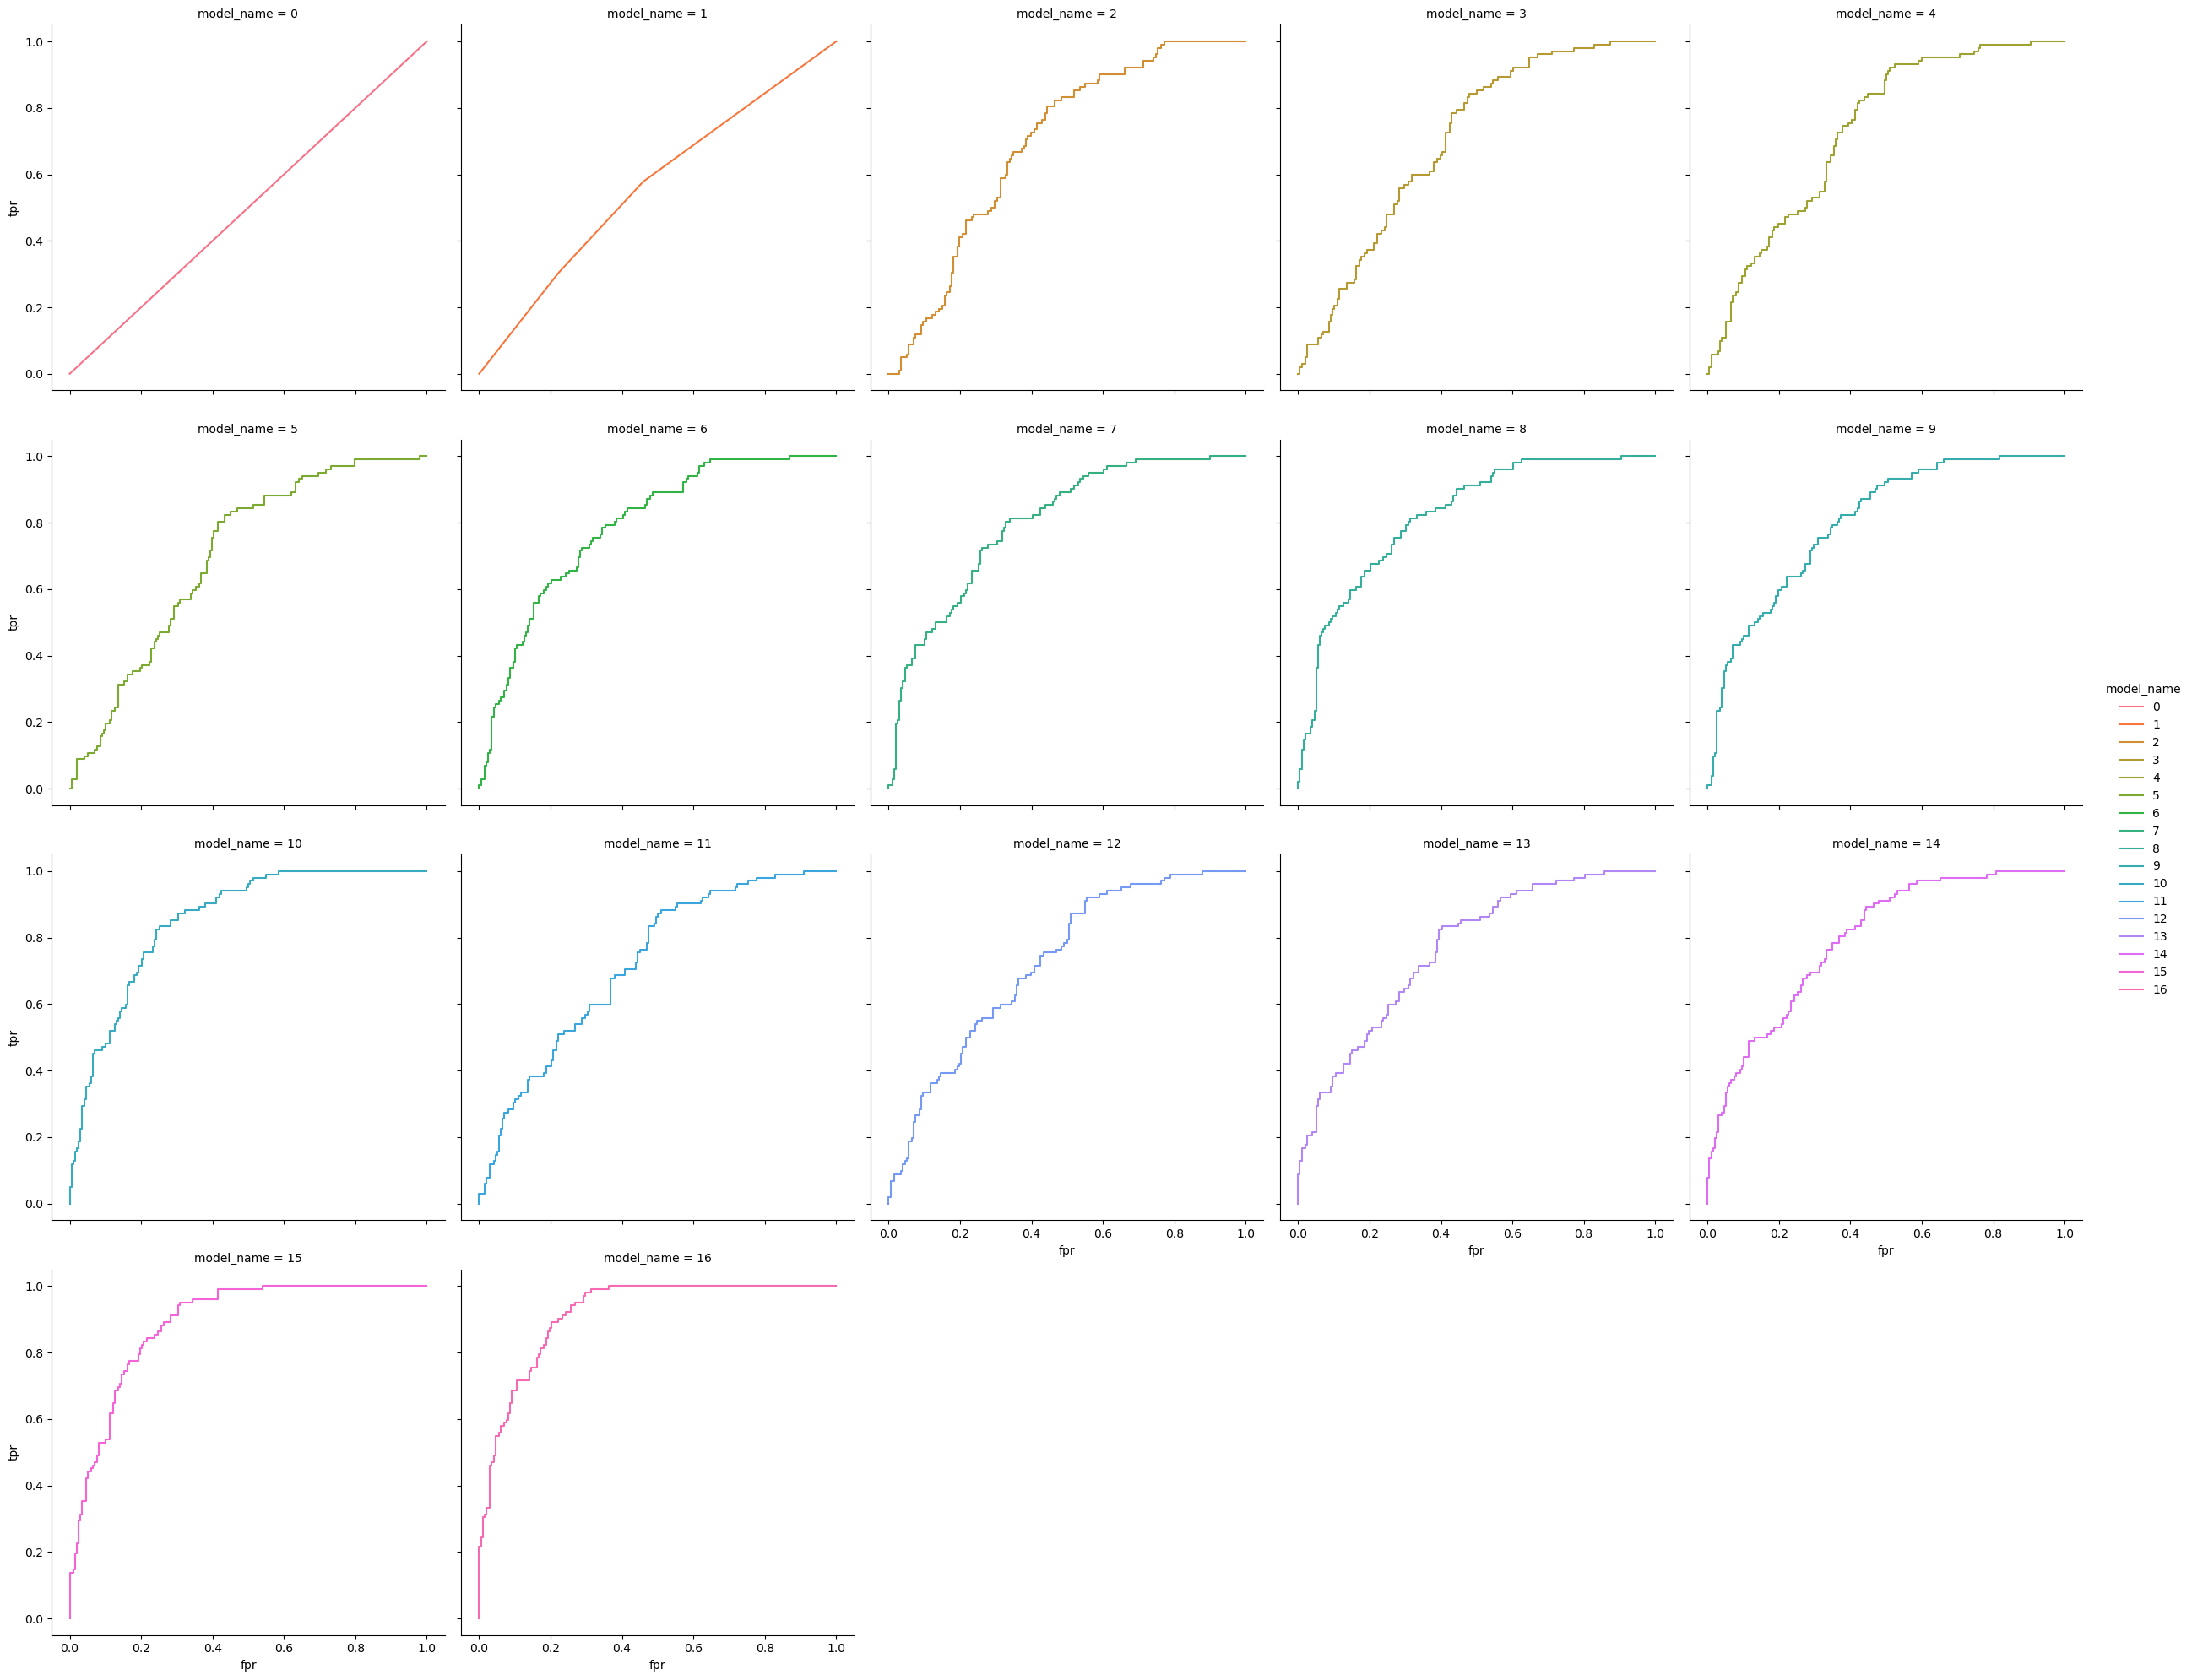

In [56]:
sns.relplot(data=roc_df, x="fpr", y="tpr", col="model_name", col_wrap=5, hue="model_name",
            kind="line", estimator=None, units="model_name")

plt.show()

## Performance Summary
According to the TRAINING SET, the data used to FIT the models, the MODEL with the MOST NUMBER of UNCOMMON COEFFICIENTS or SLOPES to estimate is the BEST!!!

## Predictions
Lets make a PREDICTION GRID to allow VISUALIZING the PREDICTED EVENT PROBABILITY for different INPUT COMBINATIONS.

Lets just focus on the relationship between the EVENT PROBABILITY and x1 for different values of x2 and the categorical input.

In [57]:
df

,x1,x2,x3,x4,x5,y
0,1.077412,-0.991094,0.208610,-1.019744,c,1
1,-0.637747,-0.307506,-1.794250,1.189993,b,0
2,1.345143,-1.075281,1.685044,0.167879,b,0
3,1.659924,0.735156,-0.210541,-2.534105,b,1
4,1.182378,1.599140,-0.301995,1.206648,b,0
...,...,...,...,...,...,...
295,1.239739,1.572756,0.610548,1.402896,c,0
296,-0.528292,3.120873,0.357688,-0.599724,c,0
297,0.256334,1.293508,0.023925,-0.996928,b,0
298,-0.628451,0.373513,0.038140,2.197234,b,1


In [58]:
input_grid = pd.DataFrame([(x1, x2, x3, x4, x5) for x1 in np.linspace(df.x1.min(), df.x1.max(), num=101)
                                            for x2 in np.linspace(df.x2.min(), df.x2.max(), num=9)
                                            for x3 in [df.x3.mean()]
                                            for x4 in [df.x4.mean()]
                                            for x5 in df.x5.unique()],
                         columns=["x1", "x2", "x3", "x4", "x5"])

In [59]:
input_grid

,x1,x2,x3,x4,x5
0,-2.913116,-3.008946,0.002302,0.001372,c
1,-2.913116,-3.008946,0.002302,0.001372,b
2,-2.913116,-3.008946,0.002302,0.001372,a
3,-2.913116,-2.242719,0.002302,0.001372,c
4,-2.913116,-2.242719,0.002302,0.001372,b
...,...,...,...,...,...
2722,2.783826,2.354646,0.002302,0.001372,b
2723,2.783826,2.354646,0.002302,0.001372,a
2724,2.783826,3.120873,0.002302,0.001372,c
2725,2.783826,3.120873,0.002302,0.001372,b


In [60]:
input_grid.shape

(2727, 5)

In [61]:
input_grid.nunique()

x1    101
x2      9
x3      1
x4      1
x5      3
dtype: int64

In [62]:
input_grid.x5.value_counts()

x5
c    909
b    909
a    909
Name: count, dtype: int64

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


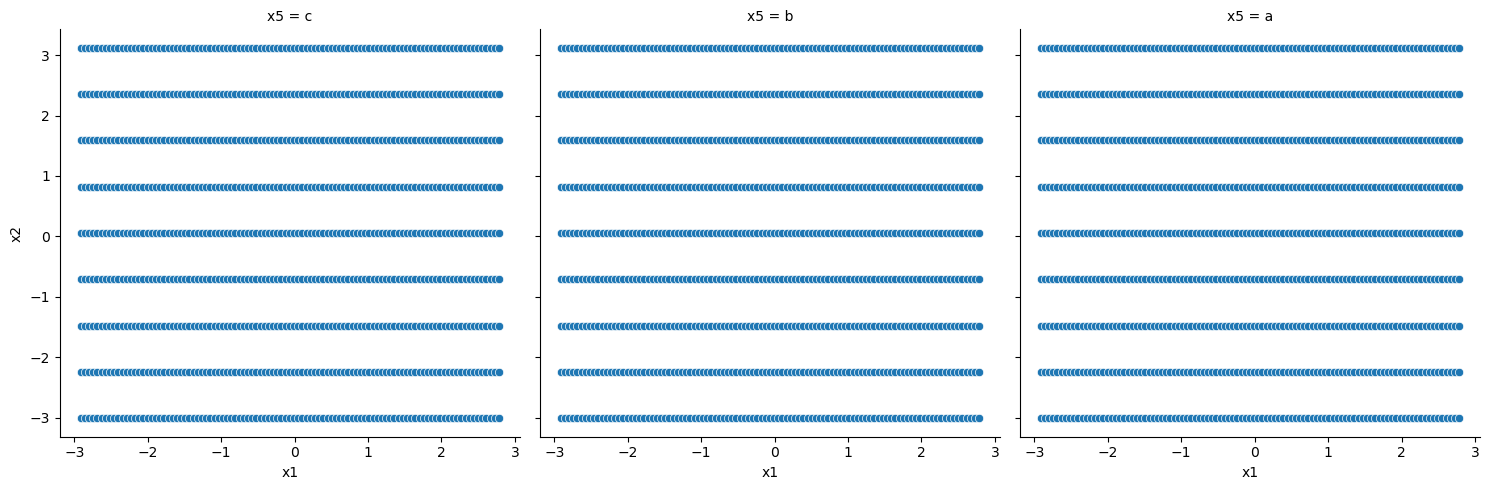

In [63]:
sns.relplot(data=input_grid, x="x1", y="x2", col="x5")

plt.show()

Remember, we fit a few models earlier.

In [64]:
mod_bb.params

Intercept   -0.674470
x5[T.b]     -0.289844
x5[T.c]      0.310042
x1           0.310394
x2          -0.579591
x3           0.113856
x4          -0.048754
dtype: float64

In [65]:
dfviz = input_grid.copy()

In [66]:
dfviz["pred_probability_bb"] = mod_bb.predict(input_grid)

In [67]:
dfviz

,x1,x2,x3,x4,x5,pred_probability_bb
0,-2.913116,-3.008946,0.002302,0.001372,c,0.616688
1,-2.913116,-3.008946,0.002302,0.001372,b,0.468947
2,-2.913116,-3.008946,0.002302,0.001372,a,0.541273
3,-2.913116,-2.242719,0.002302,0.001372,c,0.507853
4,-2.913116,-2.242719,0.002302,0.001372,b,0.361589
...,...,...,...,...,...,...
2722,2.783826,2.354646,0.002302,0.001372,b,0.187739
2723,2.783826,2.354646,0.002302,0.001372,a,0.235966
2724,2.783826,3.120873,0.002302,0.001372,c,0.212658
2725,2.783826,3.120873,0.002302,0.001372,b,0.129108


/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


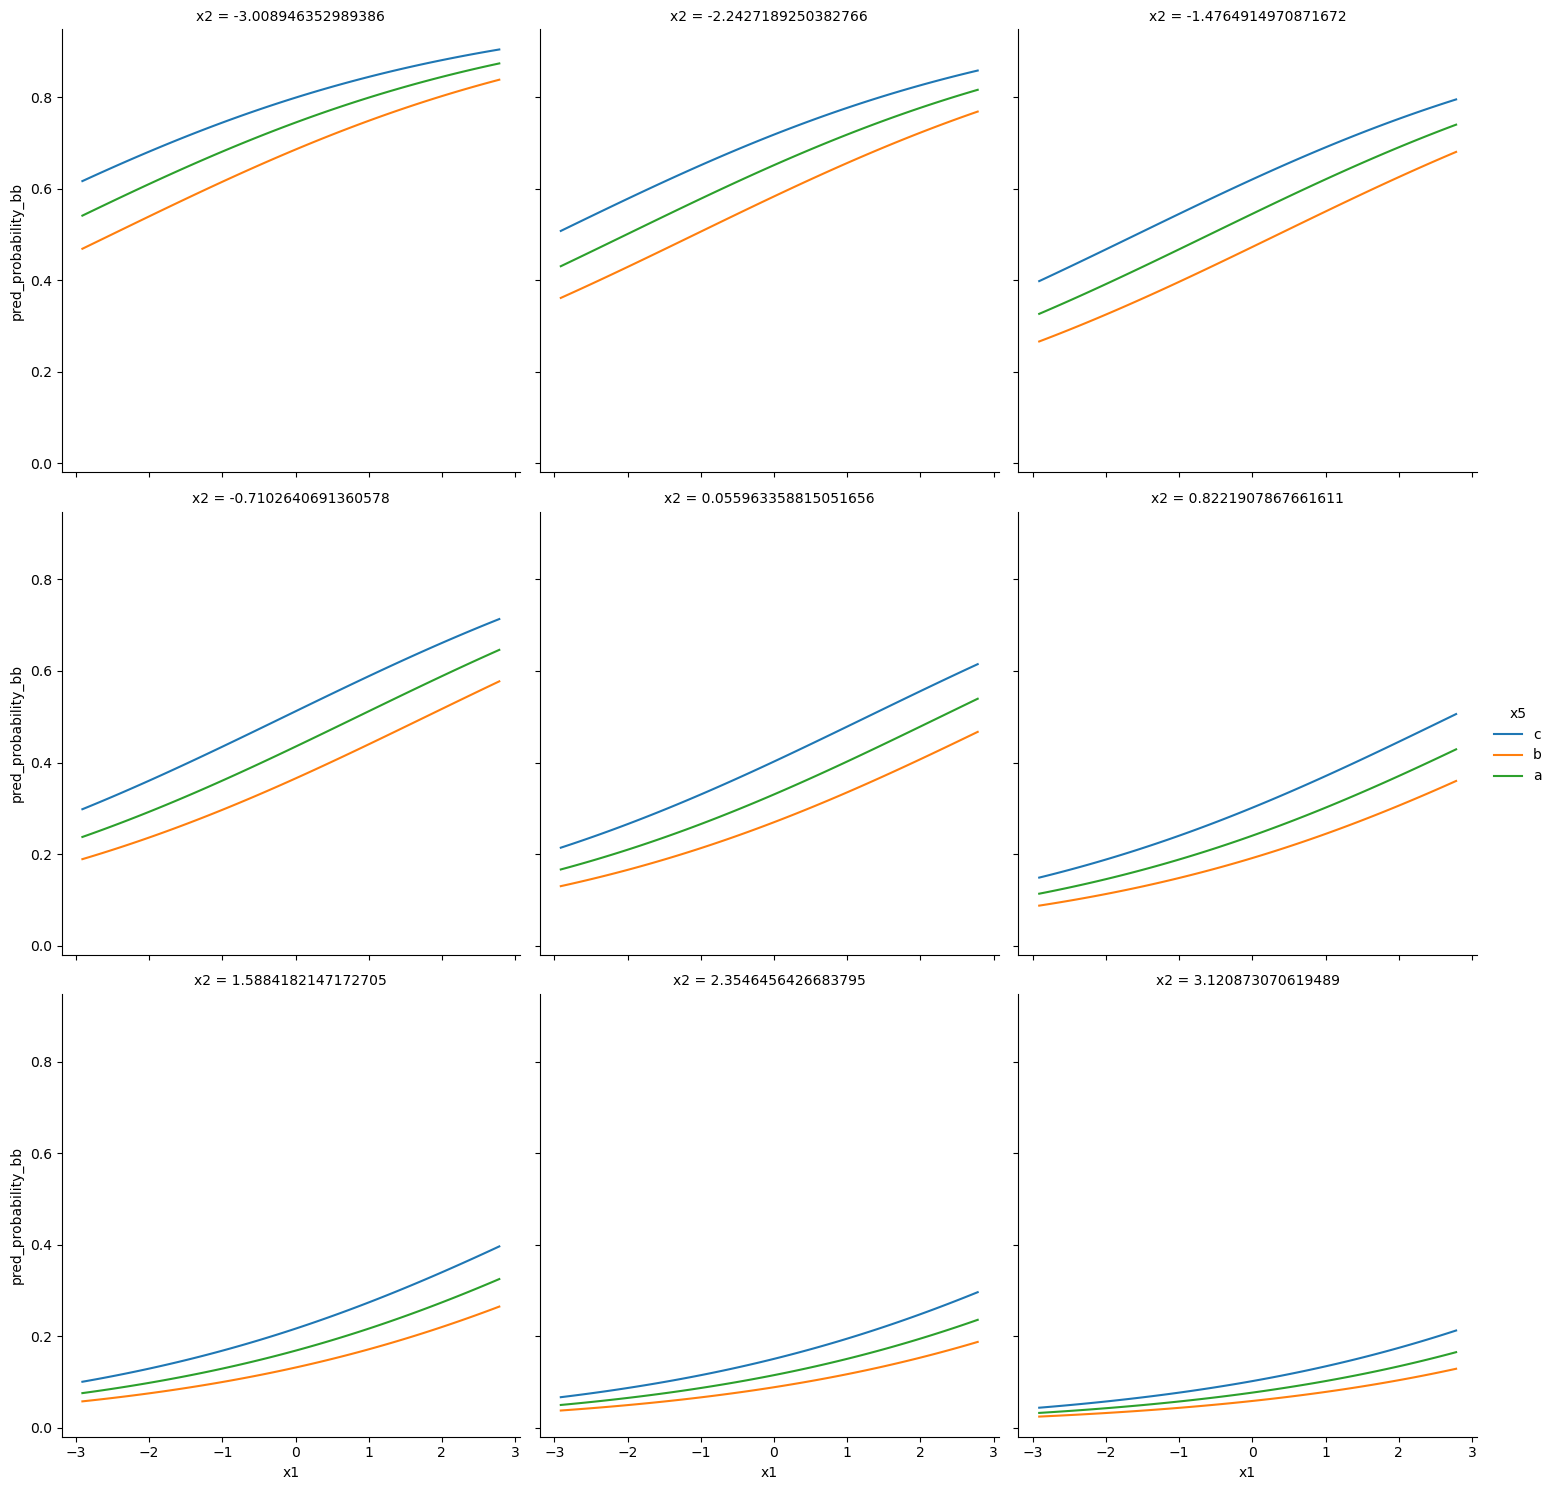

In [70]:
sns.relplot(data=dfviz, x="x1", y="pred_probability_bb", hue="x5", col="x2", 
            kind="line", estimator=None, units="x5", col_wrap=3)

plt.show()

In [71]:
mod_bb.params

Intercept   -0.674470
x5[T.b]     -0.289844
x5[T.c]      0.310042
x1           0.310394
x2          -0.579591
x3           0.113856
x4          -0.048754
dtype: float64

In [72]:
mod_bb.pvalues

Intercept    0.007968
x5[T.b]      0.356504
x5[T.c]      0.380769
x1           0.017173
x2           0.000024
x3           0.380242
x4           0.708586
dtype: float64

In [73]:
formula_list[len(formula_list)-1]

'y ~ x5 * ( (x1 + x2 + x3 + x4) ** 3 + np.power(x1, 2) + np.power(x2 ,2) + np.power(x3 ,2) + np.power(x4 ,2) + np.power(x1, 3) + np.power(x2 ,3) + np.power(x3 ,3) + np.power(x4 ,3) + np.power(x1, 4) + np.power(x2 ,4) + np.power(x3 ,4) + np.power(x4 ,4))'

In [74]:
mod_complex = smf.logit(formula=formula_list[len(formula_list)-1], data=df).fit()

Optimization terminated successfully.
         Current function value: 0.335107
         Iterations 12


In [76]:
mod_complex.params.to_numpy()

array([ 1.32058095, -1.55282638, -0.02290171, -0.9988693 ,  1.2102127 ,
        4.66947597,  1.90020218, -2.80989522,  0.01302911,  2.48168371,
       -0.96904051, -3.70302173, -2.00940075,  2.05631202, -1.42985181,
       -1.96785309,  3.25014955, -2.70804585, -0.58525923,  0.05788615,
        2.25275043,  0.89524115, -1.68284148,  1.52848922, -1.14562035,
        2.31962476,  3.7961458 , -0.50683116,  0.46859127,  1.42882239,
        1.31683802, -1.20552019,  1.06433771, -0.34984964,  0.29108868,
       -5.68198569,  0.73811828, -0.97567907, -5.31258558,  0.51251628,
       -0.23690389, -1.06781236, -0.88103307,  0.95685953, -1.40207326,
        0.78548406,  0.32390322, -6.11743806, -0.39173843, -1.41806941,
        1.74981065, -2.08533623, -0.07217375, -0.85639912, -1.18932018,
        1.95855023,  7.7673739 ,  1.54691021, -0.69605481, -1.9847706 ,
       -4.90112106,  3.96307639,  3.21648377, -0.60610656,  0.63119099,
        0.994993  ,  0.4187507 , -0.44076032,  1.67639326, -1.16

In [77]:
dfviz["pred_probability_complex"] = mod_complex.predict(input_grid)

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


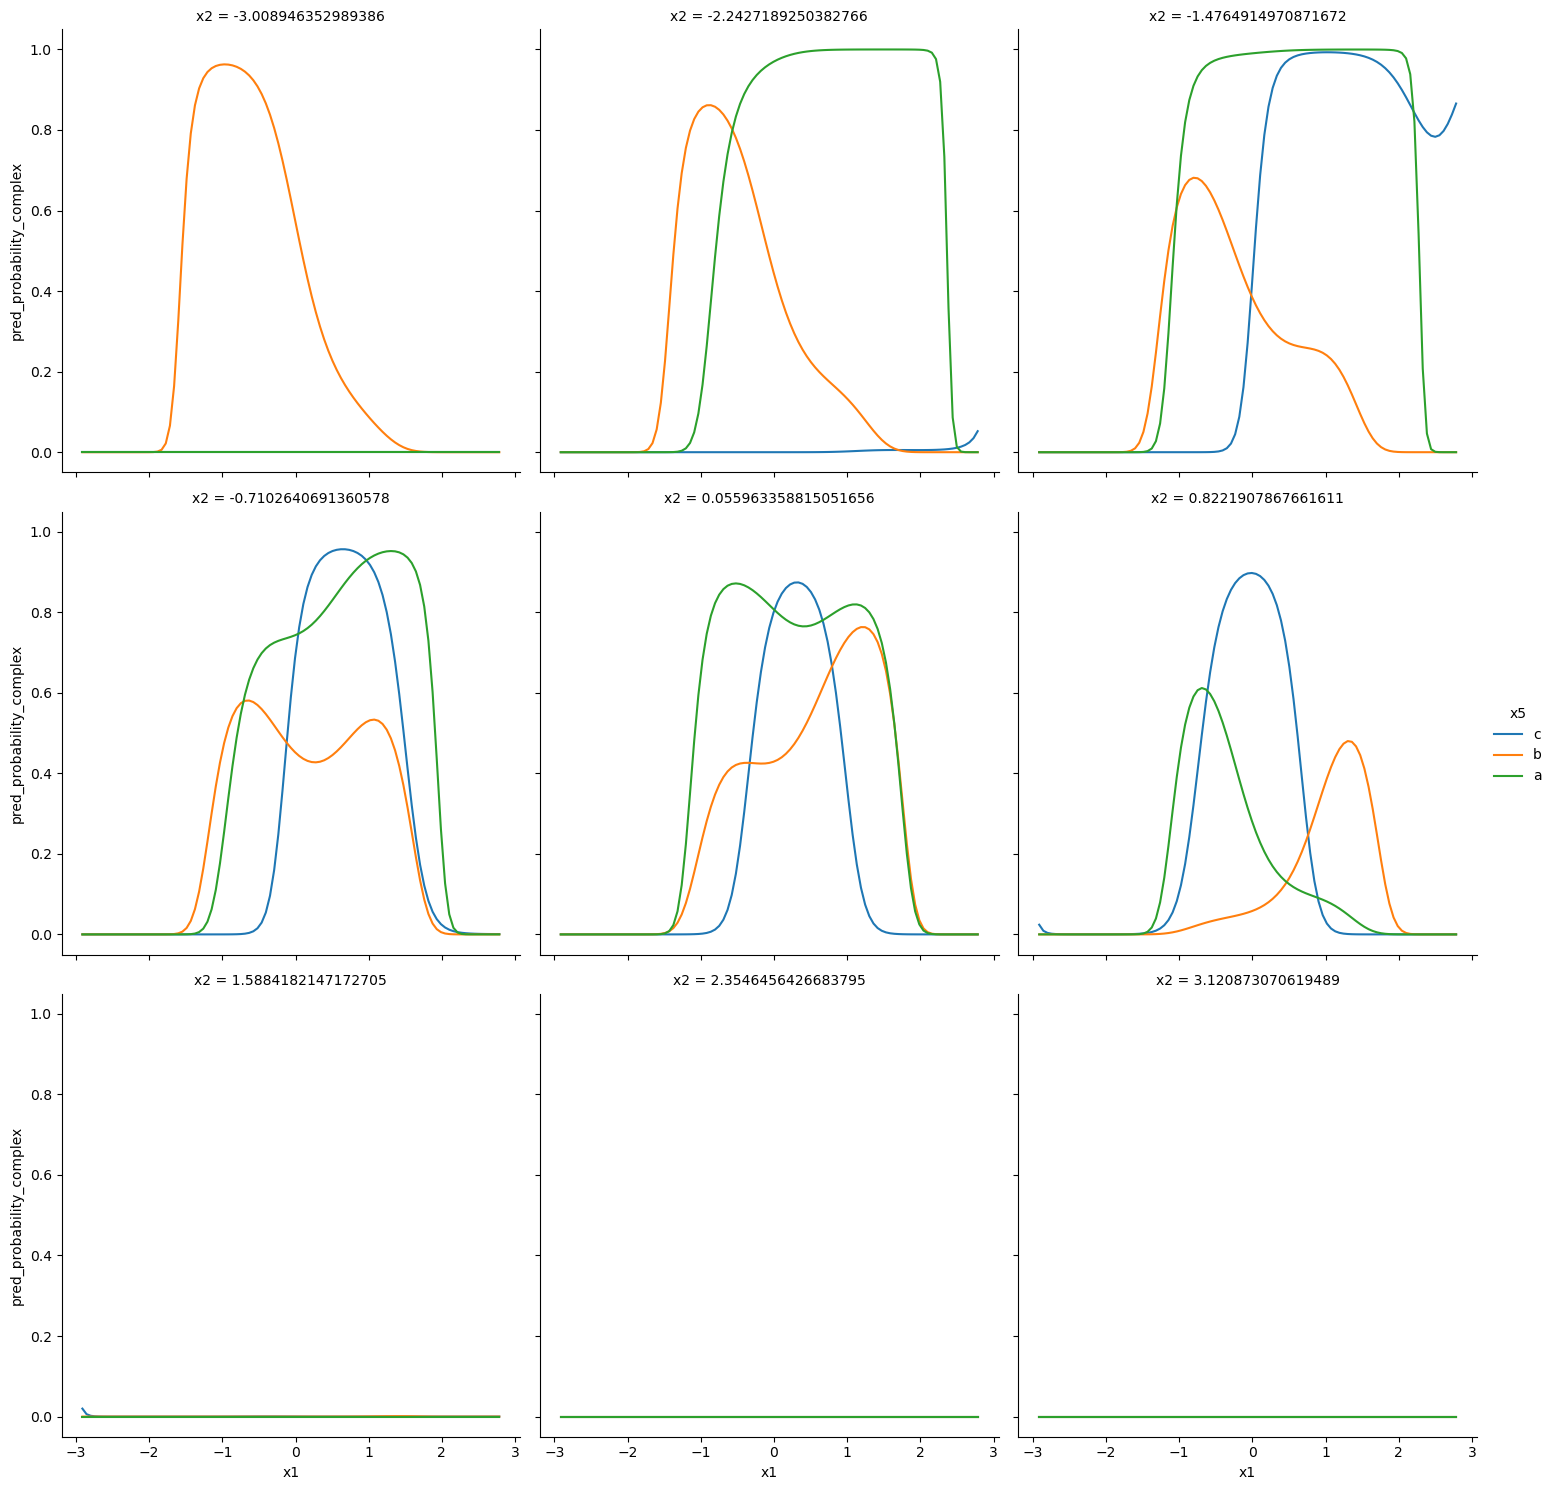

In [78]:
sns.relplot(data=dfviz, x="x1", y="pred_probability_complex", hue="x5", col="x2", 
            kind="line", estimator=None, units="x5", col_wrap=3)

plt.show()